Veamos las estadisticas de la DB
* La DB es una lista de interacciones insecto/planta con metadatos incluidos

Las principales columnas que nos interesan son:
* habitat	habitat de muestreo, puede ser huerto o area natural pero nunca los dos
* muestreot	nombre muestreo, heladas,secas,lluvias. Es lo mismo que muestreo pero nominal
* familia	familia taxonomica  a la que pertenecen las especies animales
* guild	    Grupo funcional: cuatro grupos funcionales
* especies_final	identificador unico para cada especie: USAR
* abundancia	numero de individuos de cada especie
* spvegabrev	nombre cientifico de la planta ABREVIADO. USAR

Nota: tenemos densidad/abundancia de plantas?

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#matplotlib.style.use('ggplot')

Cargar data

Determinar cuantos tipos diferentes de datos tenemos por columnas

Tambien se quitaron todas las columnas que no nos interesan

In [2]:
data = pd.read_csv("Gral_DB_floralvisitors.csv")
d_columns = ["habitat", "muestreot", "familia", 'genero', "guild", "especies_final", "abundancia", "spvegabrev"]
data = data[d_columns]

for c in data: print c, data[c].nunique()

habitat 2
muestreot 3
familia 42
genero 126
guild 4
especies_final 210
abundancia 15
spvegabrev 100


Sin apimel en los datos

In [3]:
data_clean = data[data.especies_final != 'apimel']

print "Columna\tCon apimel\tSin apimel"
for c in data: print c, data[c].nunique(), data_clean[c].nunique()

Columna	Con apimel	Sin apimel
habitat 2 2
muestreot 3 3
familia 42 42
genero 126 125
guild 4 4
especies_final 210 209
abundancia 15 5
spvegabrev 100 94


Vamos a cambiar el nombre de familia y genero de apimel para distinguir mejor su efecto

In [4]:
data.loc[data.especies_final == 'apimel', 'familia'] = 'apimel'
data.loc[data.especies_final == 'apimel', 'genero'] = 'apimel'

Exportar datos resumidos para correr en 

http://app.rawgraphs.io/

In [5]:
data.to_csv('data_clean.csv', index=False)

# Apimel
Apimel es un outlier


Con cuantas especies de plantas tiene interacciones apimel

Respuesta: mas o menos con la mitad

In [6]:
data_apimel = data[data.especies_final == 'apimel']
print 'total', data_apimel["spvegabrev"].nunique(), '/', data["spvegabrev"].nunique()
for ot in data["muestreot"].unique():
    print ot, 
    print data[(data.muestreot == ot) & (data.especies_final == 'apimel')]['spvegabrev'].nunique(), '/',
    print data[data.muestreot == ot]['spvegabrev'].nunique()

total 52 / 100
heladas 16 / 34
secas 19 / 34
lluvias 33 / 67


# Distribución especies


Diagramas de venn de especies por temporada y area

Si se ven las intersecciones esta pasando algo interesante

Hay plantas e insectos que pasan una temporada en un entorno, y otra temportada en otro
¿sabemos cuales son estos 'migrantes'?

El aluvial podría darnos estos datos, pero sale muy sucio como para leerlo
¿Que alternativa hay?


In [7]:
from matplotlib_venn import venn2, venn3

<matplotlib_venn._common.VennDiagram instance at 0x7f4475ddc3b0>

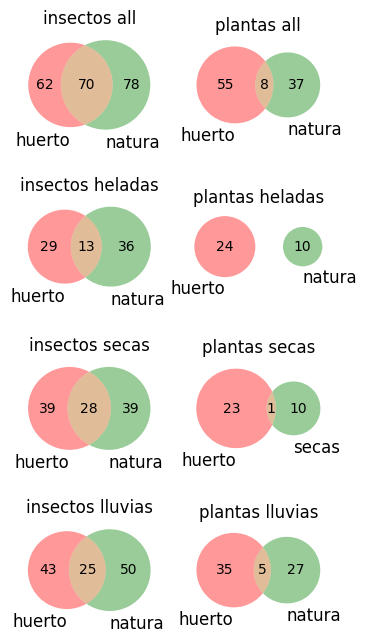

In [8]:
plt.figure(figsize=(4,8))

plt.subplot(421)
plt.title('insectos all')
i_natura = set(data[data.habitat == 'areanatural']['especies_final'].unique())
i_huerto = set(data[data.habitat == 'huerto']['especies_final'].unique())
venn2([i_huerto, i_natura], set_labels = ('huerto', 'natura'))

plt.subplot(422)
plt.title('plantas all')
p_natura = set(data[data.habitat == 'areanatural']['spvegabrev'].unique())
p_huerto = set(data[data.habitat == 'huerto']['spvegabrev'].unique())
venn2([p_huerto, p_natura], set_labels = ('huerto', 'natura'))


#Heladas
plt.subplot(423)
plt.title('insectos heladas')
i_natura = set(data[(data.habitat == 'areanatural') & (data.muestreot == 'heladas')]['especies_final'].unique())
i_huerto = set(data[(data.habitat == 'huerto') & (data.muestreot == 'heladas')]['especies_final'].unique())
venn2([i_huerto, i_natura], set_labels = ('huerto', 'natura'))

plt.subplot(424)
plt.title('plantas heladas')
p_natura = set(data[(data.habitat == 'areanatural') & (data.muestreot == 'heladas')]['spvegabrev'].unique())
p_huerto = set(data[(data.habitat == 'huerto') & (data.muestreot == 'heladas')]['spvegabrev'].unique())
venn2([p_huerto, p_natura], set_labels = ('huerto', 'natura'))


#Secas
plt.subplot(425)
plt.title('insectos secas')
i_natura = set(data[(data.habitat == 'areanatural') & (data.muestreot == 'secas')]['especies_final'].unique())
i_huerto = set(data[(data.habitat == 'huerto') & (data.muestreot == 'secas')]['especies_final'].unique())
venn2([i_huerto, i_natura], set_labels = ('huerto', 'natura'))

plt.subplot(426)
plt.title('plantas secas')
p_natura = set(data[(data.habitat == 'areanatural') & (data.muestreot == 'secas')]['spvegabrev'].unique())
p_huerto = set(data[(data.habitat == 'huerto') & (data.muestreot == 'secas')]['spvegabrev'].unique())
venn2([p_huerto, p_natura], set_labels = ('huerto', 'secas'))



#Lluvias
plt.subplot(427)
plt.title('insectos lluvias')
i_natura = set(data[(data.habitat == 'areanatural') & (data.muestreot == 'lluvias')]['especies_final'].unique())
i_huerto = set(data[(data.habitat == 'huerto') & (data.muestreot == 'lluvias')]['especies_final'].unique())
venn2([i_huerto, i_natura], set_labels = ('huerto', 'natura'))

plt.subplot(428)
plt.title('plantas lluvias')
p_natura = set(data[(data.habitat == 'areanatural') & (data.muestreot == 'lluvias')]['spvegabrev'].unique())
p_huerto = set(data[(data.habitat == 'huerto') & (data.muestreot == 'lluvias')]['spvegabrev'].unique())
venn2([p_huerto, p_natura], set_labels = ('huerto', 'natura'))


<matplotlib_venn._common.VennDiagram instance at 0x7f446ff8b050>

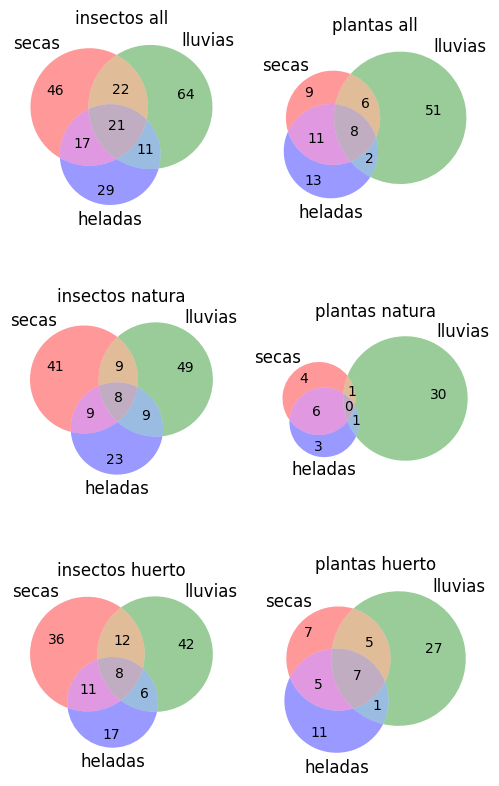

In [9]:
plt.figure(figsize=(6,10))

plt.subplot(321)
plt.title('insectos all')
i_heladas = set(data[data.muestreot == 'heladas']['especies_final'].unique())
i_secas = set(data[data.muestreot == 'secas']['especies_final'].unique())
i_lluvias = set(data[data.muestreot == 'lluvias']['especies_final'].unique())
venn3([i_secas, i_lluvias, i_heladas], set_labels = ('secas','lluvias','heladas'))

plt.subplot(322)
plt.title('plantas all')
i_heladas = set(data[data.muestreot == 'heladas']['spvegabrev'].unique())
i_secas = set(data[data.muestreot == 'secas']['spvegabrev'].unique())
i_lluvias = set(data[data.muestreot == 'lluvias']['spvegabrev'].unique())
venn3([i_secas, i_lluvias, i_heladas], set_labels = ('secas','lluvias','heladas'))


#areanatural
plt.subplot(323)
plt.title('insectos natura')
i_heladas = set(data[(data.muestreot == 'heladas') & (data.habitat == 'areanatural')]['especies_final'].unique())
i_secas = set(data[(data.muestreot == 'secas') & (data.habitat == 'areanatural')]['especies_final'].unique())
i_lluvias = set(data[(data.muestreot == 'lluvias') & (data.habitat == 'areanatural')]['especies_final'].unique())
venn3([i_secas, i_lluvias, i_heladas], set_labels = ('secas','lluvias','heladas'))

plt.subplot(324)
plt.title('plantas natura')
i_heladas = set(data[(data.muestreot == 'heladas') & (data.habitat == 'areanatural')]['spvegabrev'].unique())
i_secas = set(data[(data.muestreot == 'secas') & (data.habitat == 'areanatural')]['spvegabrev'].unique())
i_lluvias = set(data[(data.muestreot == 'lluvias') & (data.habitat == 'areanatural')]['spvegabrev'].unique())
venn3([i_secas, i_lluvias, i_heladas], set_labels = ('secas','lluvias','heladas'))


#huerto
plt.subplot(325)
plt.title('insectos huerto')
i_heladas = set(data[(data.muestreot == 'heladas') & (data.habitat == 'huerto')]['especies_final'].unique())
i_secas = set(data[(data.muestreot == 'secas') & (data.habitat == 'huerto')]['especies_final'].unique())
i_lluvias = set(data[(data.muestreot == 'lluvias') & (data.habitat == 'huerto')]['especies_final'].unique())
venn3([i_secas, i_lluvias, i_heladas], set_labels = ('secas','lluvias','heladas'))

plt.subplot(326)
plt.title('plantas huerto')
i_heladas = set(data[(data.muestreot == 'heladas') & (data.habitat == 'huerto')]['spvegabrev'].unique())
i_secas = set(data[(data.muestreot == 'secas') & (data.habitat == 'huerto')]['spvegabrev'].unique())
i_lluvias = set(data[(data.muestreot == 'lluvias') & (data.habitat == 'huerto')]['spvegabrev'].unique())
venn3([i_secas, i_lluvias, i_heladas], set_labels = ('secas','lluvias','heladas'))

# Abundancias

Grafiquemos las abundancias por distintos críterios

In [10]:
def barras_abundancia(data, agrupar='especies_final', title='', count=False, log=True):
    '''
    Gráfica de barras de abundancia por especie
    Recibe un df con columnas "especies_final" y "abundancia"
    Suma la abundancia de todos los casos de la misma especie
    Grafica
    '''
    
    if count: d = data[[agrupar,'abundancia']].groupby( [agrupar] ).count()
    else: d = data[[agrupar,'abundancia']].groupby( [agrupar] ).sum()
    d = d.sort_values(by='abundancia', ascending=False)
    plt.figure()
    d.plot(kind='bar', title=title, logy=log) 
    plt.show()
    plt.close()

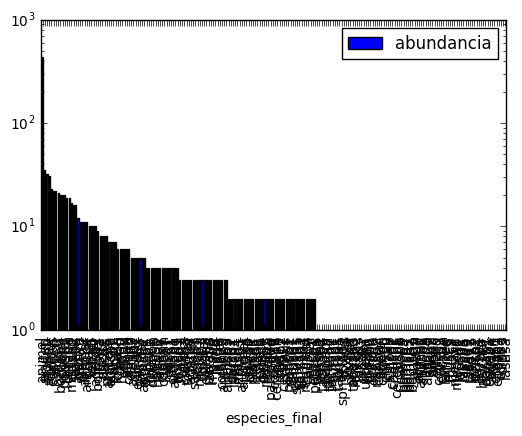

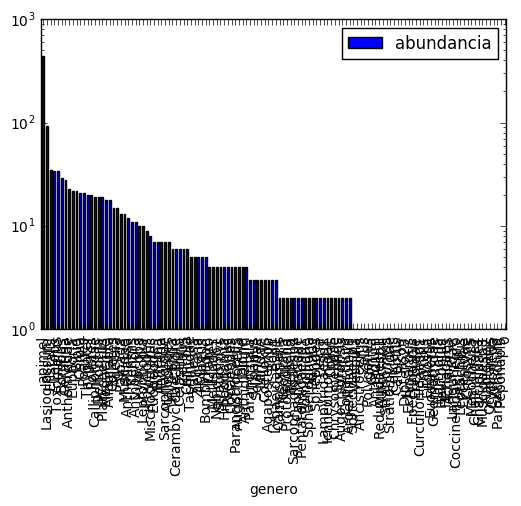

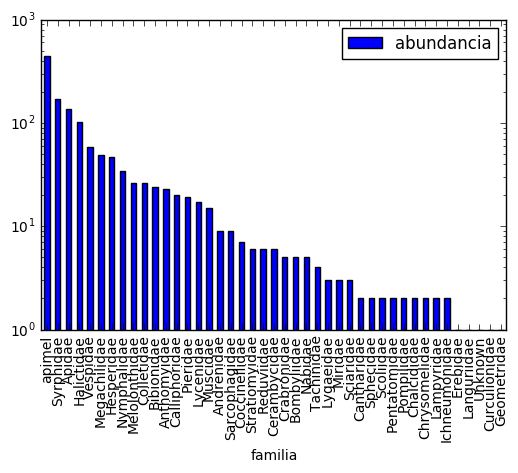

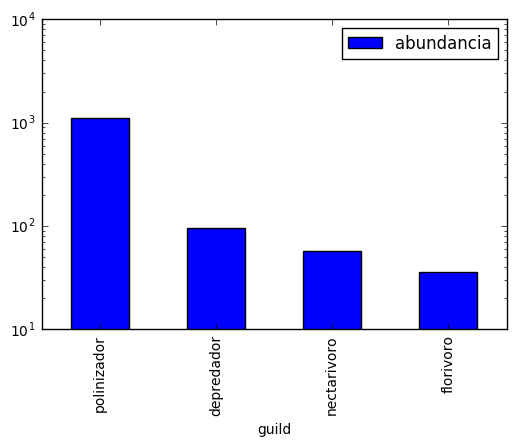

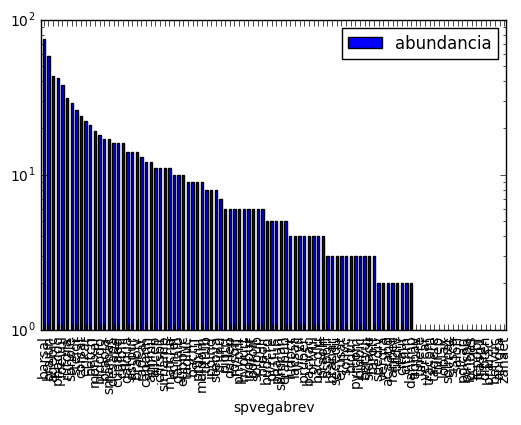

In [11]:
barras_abundancia(data)
barras_abundancia(data, 'genero')
barras_abundancia(data, 'familia')
barras_abundancia(data, 'guild')
barras_abundancia(data, 'spvegabrev', count=True)

Que sucede si quitamos a apimel

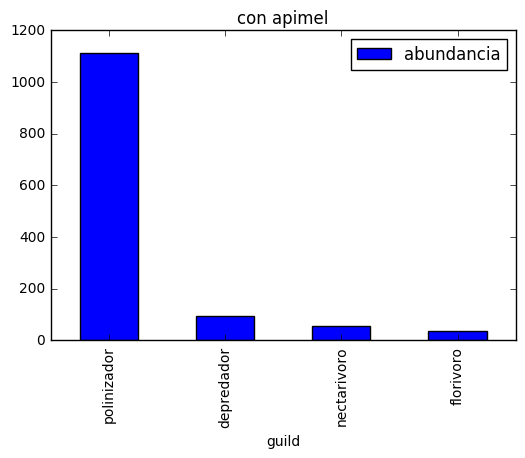

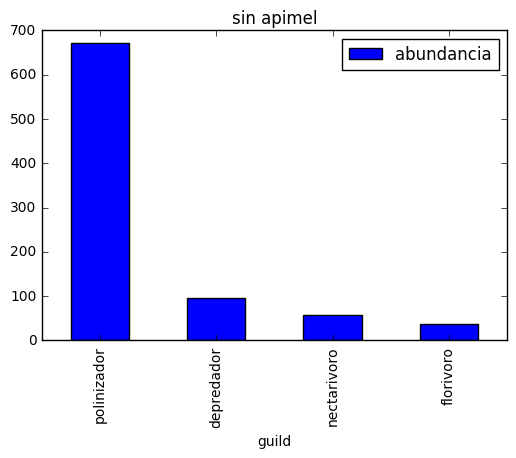

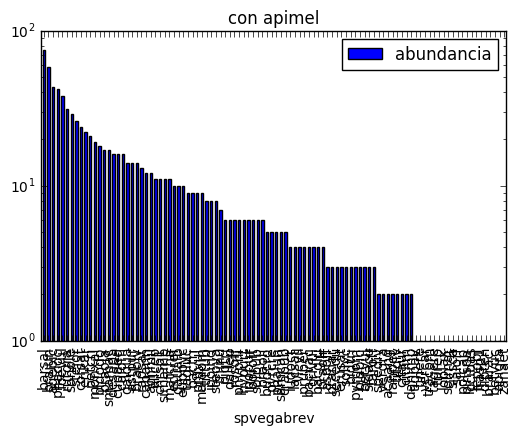

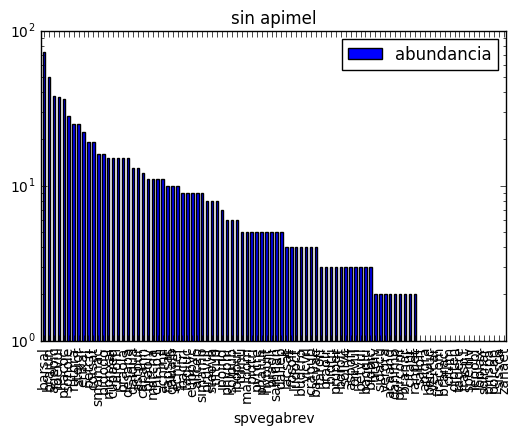

In [12]:
barras_abundancia(data, 'guild', title='con apimel', log=False)
barras_abundancia(data_clean, 'guild', title='sin apimel', log=False)
barras_abundancia(data, 'spvegabrev', title='con apimel', count=True)
barras_abundancia(data_clean, 'spvegabrev', title='sin apimel', count=True)